# Moving Average Indicator

Extremely easy approach, (not miss-confuse with the moving average time series related model which is a bit more complicated).

Indicator:
- First used back in 1901,
- One of the most popular technical indicator,
- Arithmetic mean of a given asset price over specific number of days in the past,
- Calculate the moving avg of a stock helps to smooth out the price data.



$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$


### Long time periods (slow SMA)
- popular times are 50, 100 and 200,
- Less sensitive as price changes,
- used for long term positions.


### Short time periods (fast sma)
- popular times are 15, 20 and 30,
- more sensitive to price changes so no that smooth,
- used mostly for short term positions.

#### Example
- green series: short time sma
- blue series: long time sma

![alt text](assets/sma1.png)

In [1]:
# libraries 

import yfinance as yf 
import pandas as pd


In [2]:
def download_data(stock: str, start_date: str, end_date: str) -> pd.DataFrame:
    # Download data using yfinance
    ticker = yf.download(stock, start=start_date, end=end_date)
    
    # Print the keys of the downloaded data (for debugging)
    #rint(ticker.keys())
    
    # Create a dictionary with the required data
    data = {
        'Price': [item[0] for item in ticker['Close'].values],  # Use the 'Close' column for prices
        'Timestamp': ticker.index  # Use the index (dates) as the timestamp
    }
    # Convert the dictionary to a DataFrame
    res_df = pd.DataFrame(data)
    
    # Set the 'Timestamp' column as the index
    res_df.set_index('Timestamp', inplace=True)
    
    return res_df

# Testing the function
start = '2010-01-05'
end = '2025-01-26'

stock_data = download_data('NVDA', start, end)
print(stock_data)

[*********************100%***********************]  1 of 1 completed

                 Price
Timestamp             
2010-01-05    0.430113
2010-01-06    0.432864
2010-01-07    0.424381
2010-01-08    0.425298
2010-01-11    0.419337
...                ...
2025-01-17  137.710007
2025-01-21  140.830002
2025-01-22  147.070007
2025-01-23  147.220001
2025-01-24  142.619995

[3788 rows x 1 columns]


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('darkgrid')

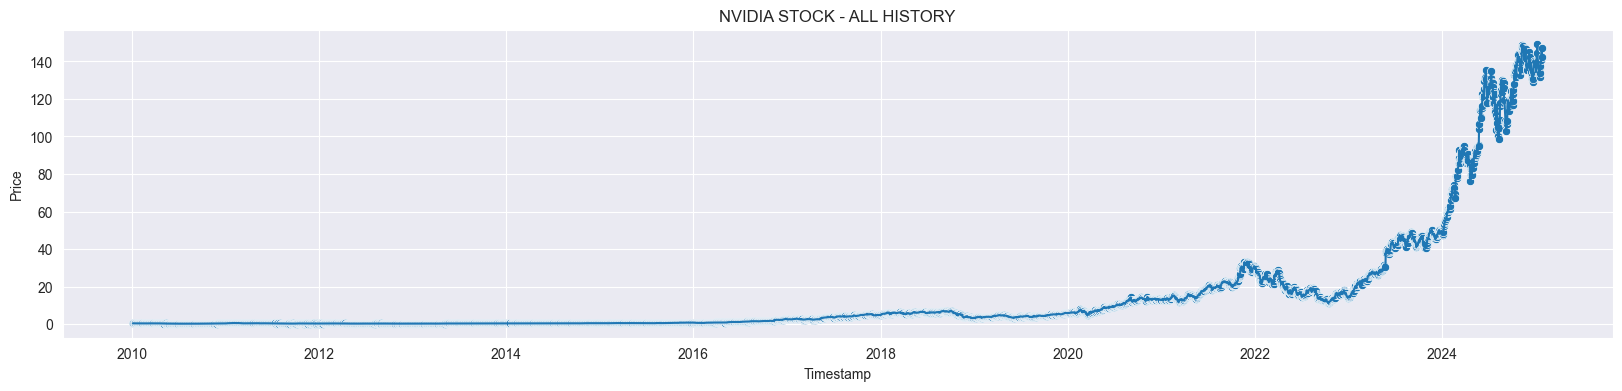

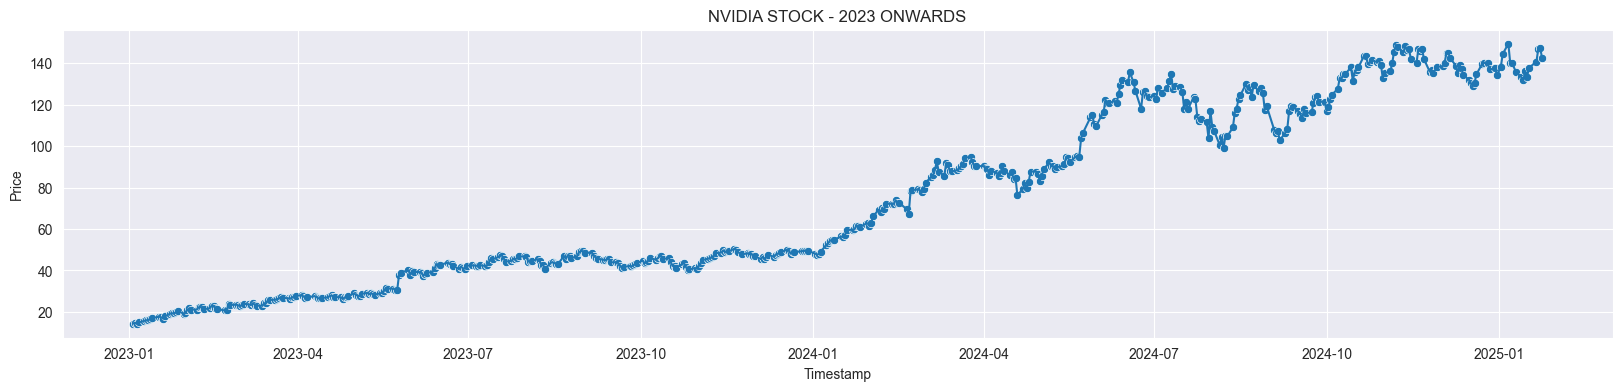

In [4]:
plt.figure(figsize=(20,4))
sns.lineplot(data=stock_data, x='Timestamp', y='Price')
sns.scatterplot(data=stock_data, x='Timestamp', y='Price')
plt.title('NVIDIA STOCK - ALL HISTORY')
plt.show()

plt.figure(figsize=(20,4))
sns.lineplot(data=stock_data['2023-01-01':], x='Timestamp', y='Price')
sns.scatterplot(data=stock_data['2023-01-01':], x='Timestamp', y='Price')
plt.title('NVIDIA STOCK - 2023 ONWARDS')
plt.show()

## SMA and Resistance Levels (algorithmic trading)

most common application of SMA (single moving avg):
- determine trend direction,
- when the S(t) price crosses their moving averages - these are usually trading signals.


#### Support level

* <b>During a bullish market, the SMAs can define the support levels. Are price levels that an asset does not fall bellow for some period of time.</b>
* we can detect these resistance levels with short as well as with fast period moving averages.

![alt text](assets/sma2.png)


#### Resistance level

* <b>During a bearish market, the SMAs can define the support levels. Are price levels that an asset does not go beyond for some period of time.</b>
* we can detect these resistance levels with short as well as with fast period moving averages.

![alt text](assets/sma3.png)


C:\Users\pops\AppData\Local\Temp\ipykernel_12544\3703184273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Short SMA'] = data['Price'].rolling(window=short_period).mean()
C:\Users\pops\AppData\Local\Temp\ipykernel_12544\3703184273.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Long SMA'] = data['Price'].rolling(window=long_period).mean()
C:\Users\pops\AppData\Local\Temp\ipykernel_12544\3703184273.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

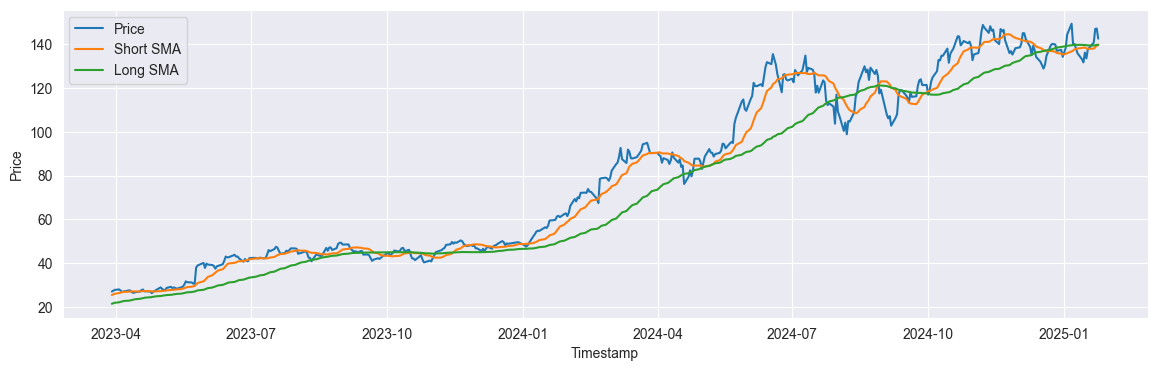

In [5]:
def construct_sma(data:pd.DataFrame, short_period:str, long_period:str, since_date:str):
    data.dropna(inplace=True)
    if since_date:
        data = data[since_date:]
    data['Short SMA'] = data['Price'].rolling(window=short_period).mean()
    data['Long SMA'] = data['Price'].rolling(window=long_period).mean()

    data.dropna(inplace=True)
    return data

def plot_data(data:pd.DataFrame):
    plt.figure(figsize=(14,4))
    for col in data.columns:
        sns.lineplot(data=data, x='Timestamp', y=col, label=col)
    plt.show()
    return 

# testing the function
data_ = construct_sma(stock_data, 15, 60, since_date='2023-01-01').copy()
plot_data(data_)

### Exponential Moving Average (EMA) Indicator

- it is similar to simple moving average indicator but here we introduce weighthing factos that decrease exponentially

Simple SMA is the unweighted mean of the previous S(t) stock prices. Using EMA we're dealing with exponentially weighted stock prices
- So, recent stock prices are more important in this model


$$
EMA_t = \alpha \cdot Price_t + (1 - \alpha) \cdot EMA_{t-1}
$$


The exponential moving avg is the weighted mean of the previous S(t) stock prices. The 'a' symbol represents the degree of decrease

C:\Users\pops\AppData\Local\Temp\ipykernel_12544\2279272385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Short EMA'] = data['Price'].ewm(span=short_period, adjust=False).mean()
C:\Users\pops\AppData\Local\Temp\ipykernel_12544\2279272385.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Long EMA'] = data['Price'].ewm(span=long_period, adjust=False).mean()
C:\Users\pops\AppData\Local\Temp\ipykernel_12544\2279272385.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

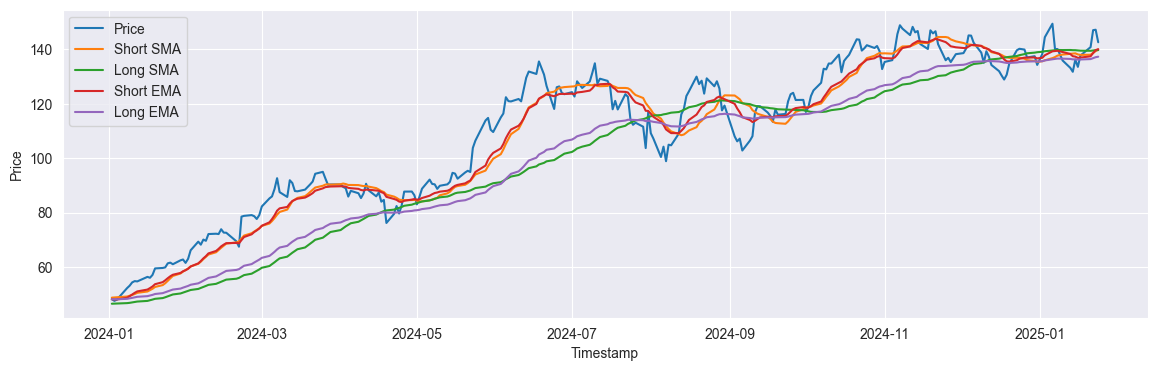

In [6]:
def construct_ema(data:pd.DataFrame, short_period:str, long_period:str, since_date:str):
    data.dropna(inplace=True)
    if since_date:
        data = data[since_date:]
    data['Short EMA'] = data['Price'].ewm(span=short_period, adjust=False).mean()
    data['Long EMA'] = data['Price'].ewm(span=long_period, adjust=False).mean()
    
    data.dropna(inplace=True)
    return data

data_ = construct_ema(data_, 15, 60, since_date='2024-01-01')

plot_data(data_)
